In [1]:
### draw a venn gram documenting overlaps between cell lines from drug sensitivity, gene essentiality and mRNA data

In [27]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

<matplotlib_venn._common.VennDiagram instance at 0x111018cb0>

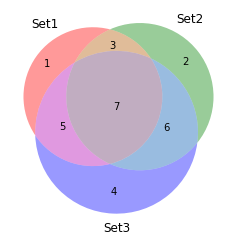

In [28]:
# example of how matplotlib_venn works
venn3(subsets = range(1, 8), set_labels = ('Set1', 'Set2', 'Set3'))

In [19]:
sensitivity_file = "../psl/data/first_model/sensitive_truth.txt"
essentiality_file = "../psl/data/first_model/essential.txt"
mRNA_file = "../psl/data/first_model/active.txt"

sensitive_df = pd.read_csv(sensitivity_file, delimiter="\t", header=None)
sensitive_set = set(sensitive_df[0])

essential_df = pd.read_csv(essentiality_file, delimiter="\t", header=None)
essential_set = set(essential_df[0])

active_df = pd.read_csv(mRNA_file, delimiter="\t", header=None)
active_set = set(active_df[0])

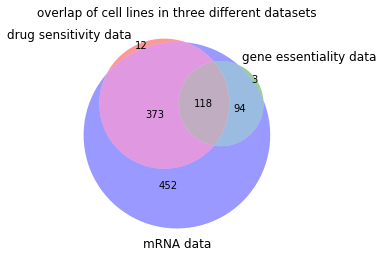

In [31]:
labels = ["drug sensitivity data", "gene essentiality data", "mRNA data"]
venn3(subsets=[sensitive_set, essential_set, active_set], set_labels=labels)
plt.title("overlap of cell lines in three different datasets")